<a href="https://colab.research.google.com/github/prafulacharya/MyLearningToDevelop/blob/master/Stock_predicton_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#The goal in linear regression is to minimize the error between the prediction and data.
# In SVR, the goal is to make sure that the errors do not exceed the threshold
#SVR in 6 setps #1 Importing the libraries#2 Importing the dataset#3 Feature Scaling
#4 Fitting the Support Vector Regression Model to the dataset[ Create your support vector regressor here]
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
#5 Predicting a new result #6 Visualising the Support Vector Regression results

In [0]:
#This program predicts the price of google stocks for a specific day using the 
#Machine learning algorithm called SVM(Support Vector Regression and Linear Regression 

#import the libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import  LinearRegression
import matplotlib.pyplot as plt


In [0]:
#load the data
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('New.csv')
df.head(7)

Saving New.csv to New.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-15,1050.170044,1080.050049,1047.339966,1077.150024,1077.150024,1463600
1,2019-01-16,1080.000000,1092.375000,1079.339966,1080.969971,1080.969971,1331800
2,2019-01-17,1079.469971,1091.800049,1073.500000,1089.900024,1089.900024,1242700
3,2019-01-18,1100.000000,1108.352051,1090.900024,1098.260010,1098.260010,1955600
4,2019-01-22,1088.000000,1091.510010,1063.469971,1070.520020,1070.520020,1613500
5,2019-01-23,1077.349976,1084.930054,1059.750000,1075.569946,1075.569946,967000
6,2019-01-24,1076.479980,1079.474976,1060.699951,1073.900024,1073.900024,1361300


In [0]:
#create variables/ x and y data list
dates=[]
prices=[]

In [0]:
#get the number of rows and columns in the data set 
df.shape

(22, 7)

In [0]:
#get the last row of data.(this will the data that we test on ).
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
21,2019-02-14,1118.050049,1128.22998,1110.444946,1121.670044,1121.670044,947600


In [0]:
#Geting the data from ata set except the last row
df=df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-15,1050.170044,1080.050049,1047.339966,1077.150024,1077.150024,1463600
1,2019-01-16,1080.000000,1092.375000,1079.339966,1080.969971,1080.969971,1331800
2,2019-01-17,1079.469971,1091.800049,1073.500000,1089.900024,1089.900024,1242700
3,2019-01-18,1100.000000,1108.352051,1090.900024,1098.260010,1098.260010,1955600
4,2019-01-22,1088.000000,1091.510010,1063.469971,1070.520020,1070.520020,1613500
5,2019-01-23,1077.349976,1084.930054,1059.750000,1075.569946,1075.569946,967000
6,2019-01-24,1076.479980,1079.474976,1060.699951,1073.900024,1073.900024,1361300
7,2019-01-25,1085.000000,1094.000000,1081.819946,1090.989990,1090.989990,1119100
8,2019-01-28,1080.109985,1083.000000,1063.800049,1070.079956,1070.079956,1284300
9,2019-01-29,1072.680054,1075.150024,1055.864990,1060.619995,1060.619995,1021800


In [0]:
#the new shape of the data
df.shape

(21, 7)

In [0]:
#get all the rows from the date column
df_dates = df.loc[:,'Date']
df_open = df.loc[:,'Open']


In [0]:
#create independent data set x
for date in df_dates:
  dates.append([int(date.split('-')[2])])

#crerate denpendent data set Y
for open_price in df_open:
  prices.append(float(open_price))

In [0]:
#Create what days were recorded
print(dates)

[[15], [16], [17], [18], [22], [23], [24], [25], [28], [29], [30], [31], [1], [4], [5], [6], [7], [8], [11], [12], [13]]


In [0]:
def predict_prices(dates, prices,x):
  #Create the 3 support vector regression model
  svr_lin=SVR(kernel='linear', C=1e3)
  svr_poly=SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf =SVR(kernel='rbf', C=1e3, gamma=0.1)

  #Train the SVR models
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)

  #create the Liner Regression model
  lin_reg = LinearRegression()
  #Train the liner Regression
  lin_reg.fit(dates,prices)

  #plot the models on the grams which have the bet fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates,svr_rbf.predict(dates), color='red', label="SVR RBF")
  plt.plot(dates,svr_poly.predict(dates), color='blue', label="SVR Poly")
  plt.plot(dates,svr_lin.predict(dates), color='green', label="SVR Linear")
  plt.plot(dates,lin_reg.predict(dates), color='orange', label="linear Reg")
  plt.xlabel('days')
  plt.ylabel('Price')
  plt.title("Regression")
  plt.legend()
  plt.show()

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

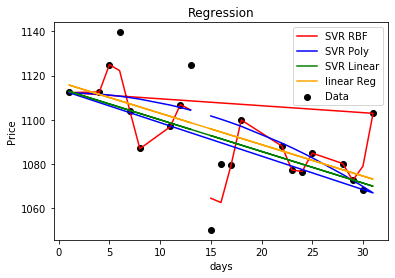

(1104.4233834448546, 1095.6745849090182, 1104.354615610666, 1098.6812249427317)


In [0]:
#predict the price of google on day 13
predicted_price =predict_prices(dates,prices,[[13]])
print(predicted_price)